# Tutorial

This notebook shows an example Exploratory Data Analysis utilizing Data Describe.

In [1]:
import data_describe as dd

## Data
This tutorial uses toy datasets from sklearn. For loading real datasets, consider using the `mw.load_data` wrapper! Try `help(mw.load_data)` for more information.

In [2]:
help(dd.load_data)

Help on function load_data in module data_describe.utilities.load_data:

load_data(filepath, all_folders=False, **kwargs)
    Create pandas data frame from filepath
    
    Args:
        filepath: The file path. Can be either a local filepath or Google Cloud Storage URI filepath
        all_folders: If True, searches for text files in nested folders. If False, looks for text files in the current folder
        kwargs: Keyword arguments to pass to the reader
            .shp: Uses geopandas.read_file
            .csv, .json, and other: Uses pandas.read_csv or pandas.read_json
    
    Returns:
        A pandas data frame



In [3]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
dat = load_boston()
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['price'] = dat['target']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Overview

In [6]:
df.shape

(506, 14)

First we inspect some of the overall statistics about the data. Some examples of interesting things to note:
- 93% of `CHAS` are the same value, zero
- `ZN` also has a high amount of zeros
- The mean of `TAX` is significantly higher than the median, suggesting this is right-skewed

In [7]:
dd.data_summary(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
Standard Deviation,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
Median,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
Min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
Max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50
# Zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,0.4,73.52,26.09,93.08,4.55,0.59,8.5,0.99,26.09,26.09,27.67,23.91,0.59,3.16


We can also look at a visual representation of the data as a heatmap:

In [8]:
dd.data_heatmap(df)

There are some sections of the data which have exactly the same values for some columns. For example, `RAD` = 1.661245 between record number 356 ~ 487. Similar patterns appear for `INDUS` and `TAX`. Is this a sorting issue or is there something else going on? Some additional investigation into data collection may answer these questions.

We can also look at the correlations:

In [9]:
dd.correlation_matrix(df)

Features like `AGE` and `DIS` appear to be inversely correlated. `CHAS` doesn't appear to have strong correlation with any other feature.

It might also help to re-order the features for comparisons using the `cluster` argument.

In [10]:
dd.correlation_matrix(df, cluster=True)

From this plot we can observe there are are two inversely related groups of features: `PTRATIO` to `NOX` and `B` to `DIS`.

## Data Inspection
We can also do some more detailed inspection of indiviudal features. 

We can show histograms and violin plots of each numeric feature using the `mw.distribution` function.

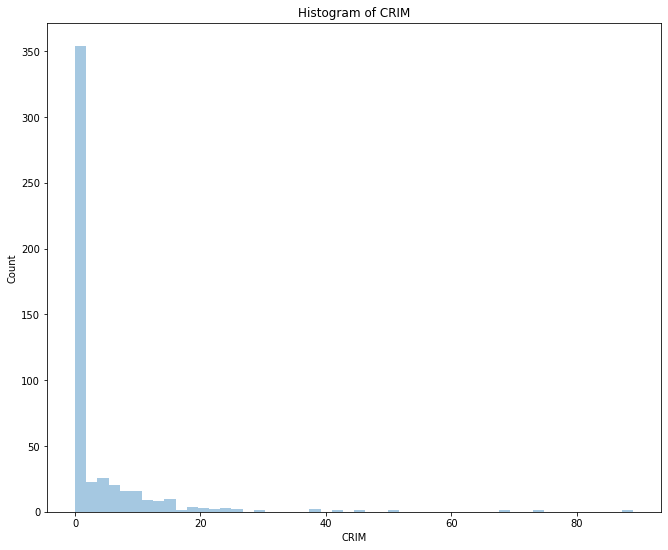

In [11]:
# Note: this is an error with the current version 0.2a
dd.distribution(df, plot_all=True)

We can also look at bivariate distributions using scatter plots. In addition to plotting all pairs in a scatterplot matrix, we can also specify a filter for certain scatterplot diagnostic features.

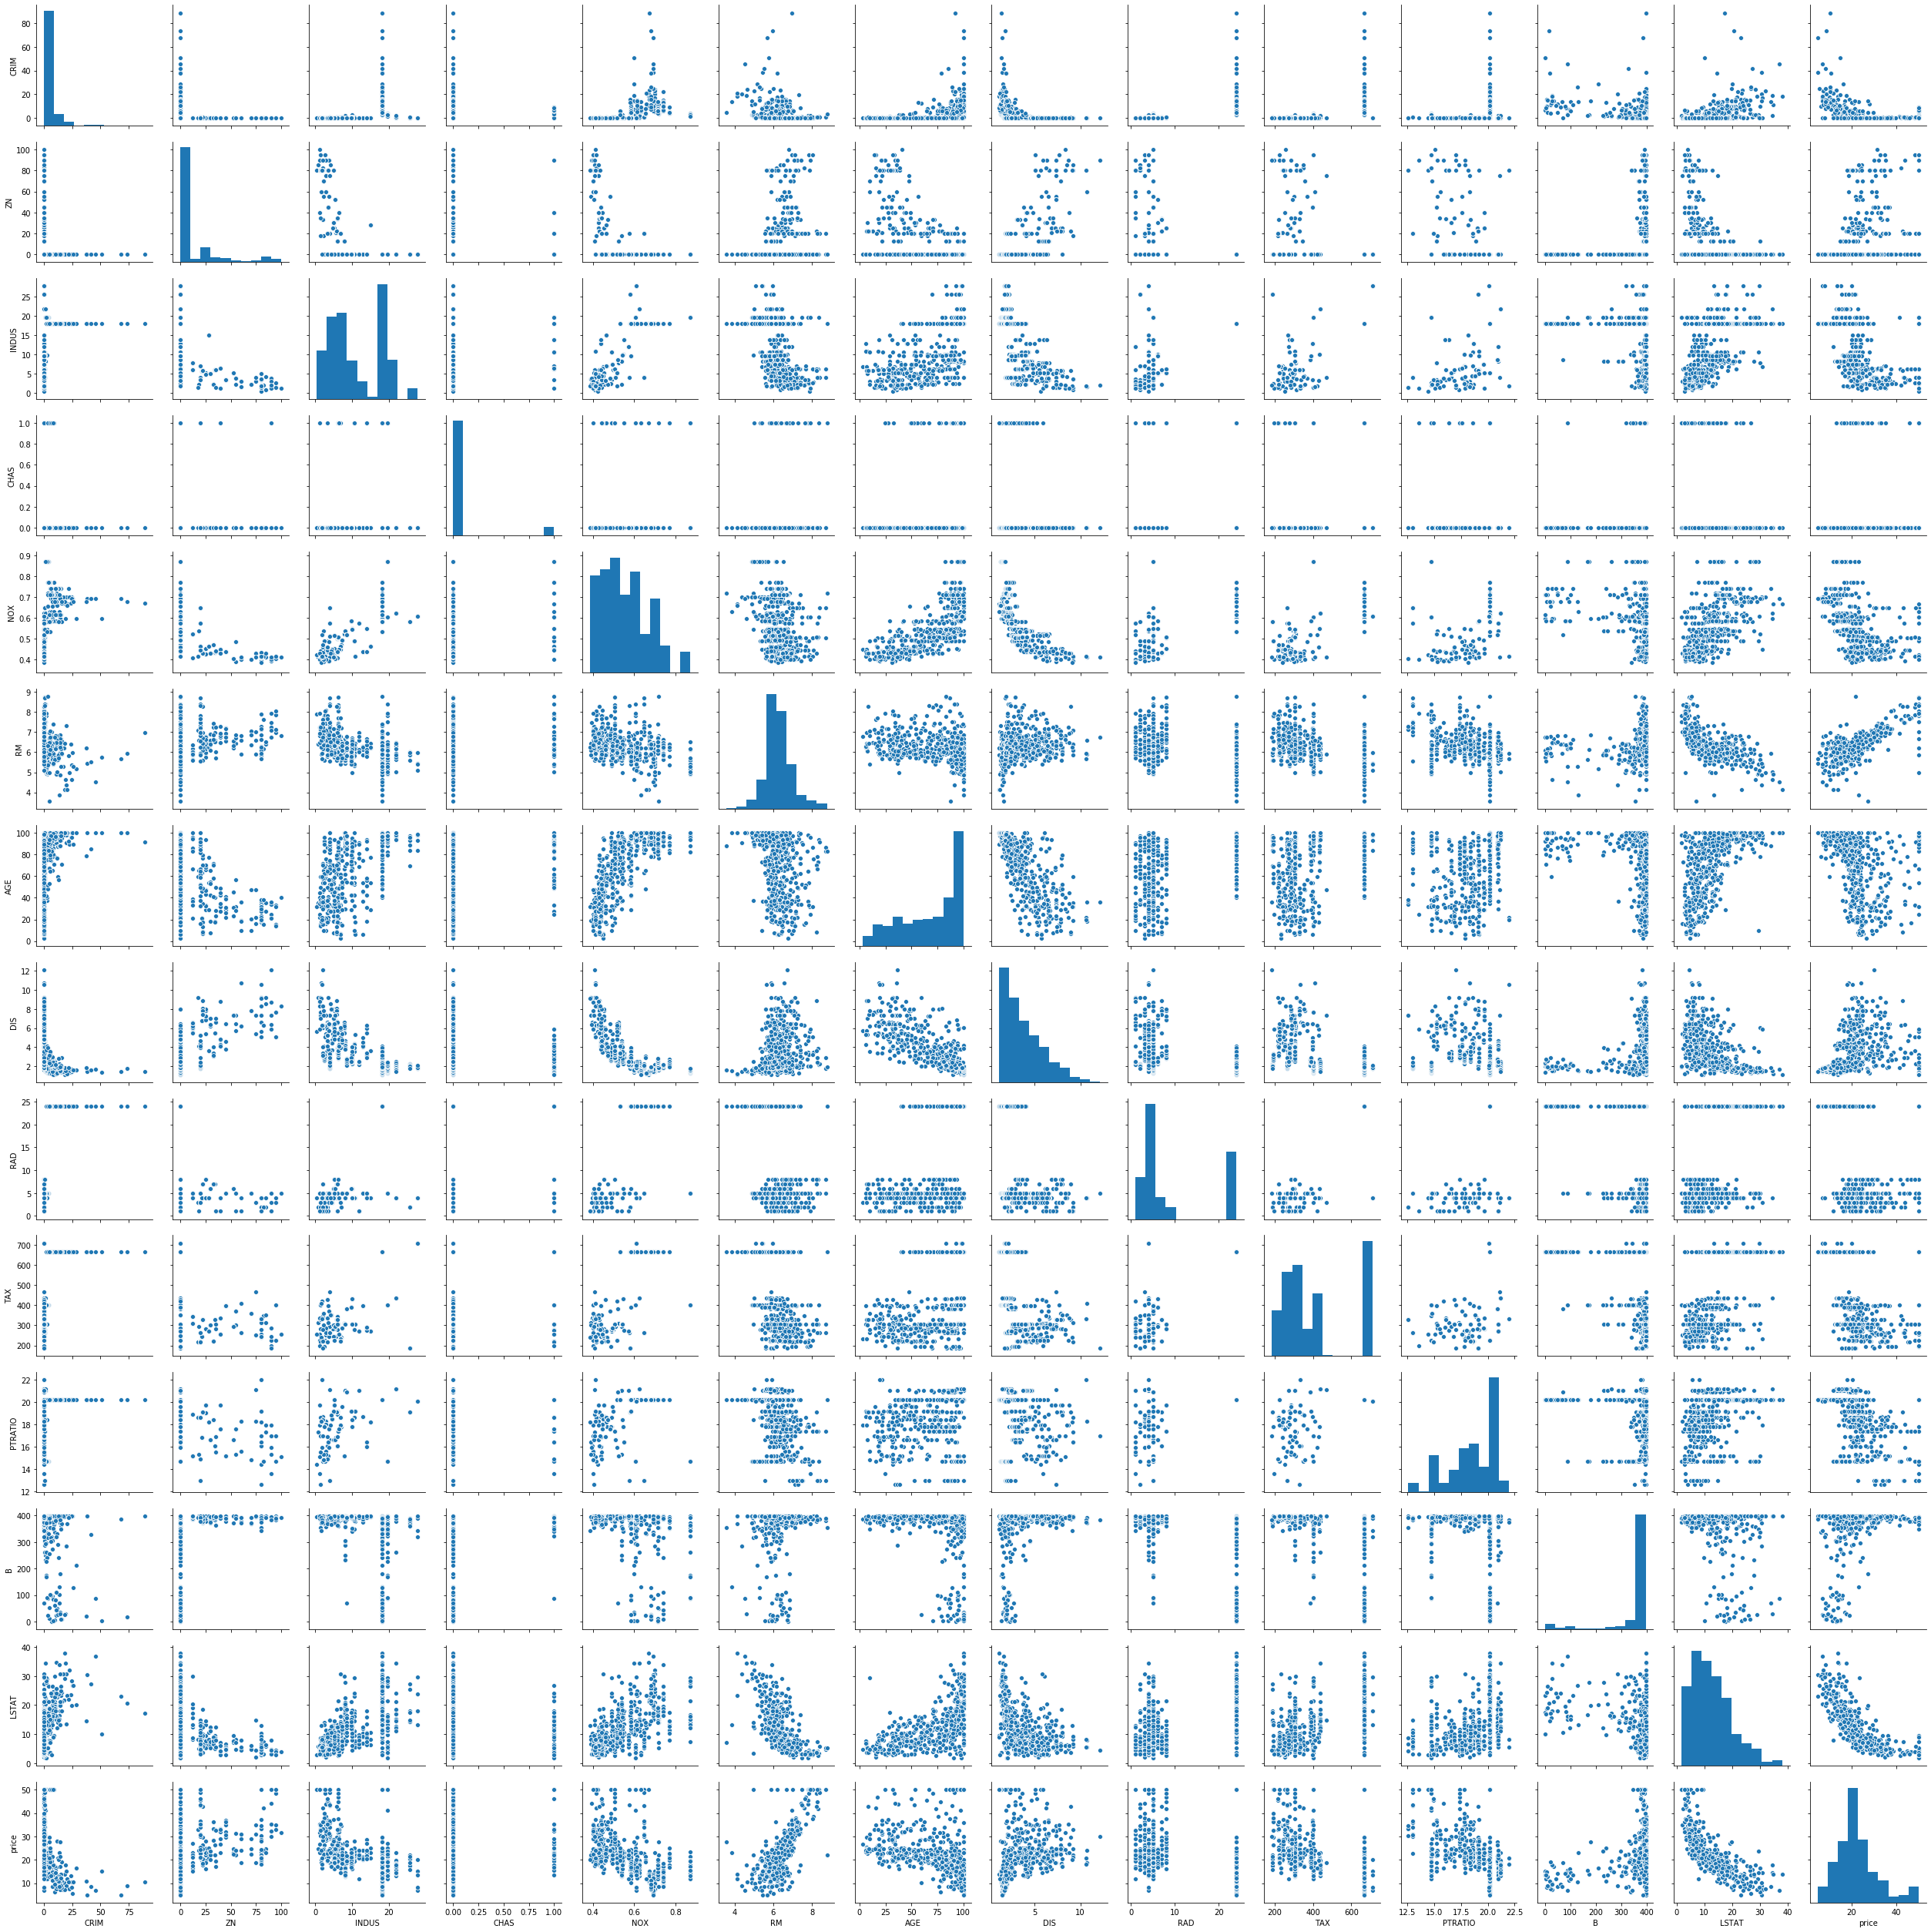

In [12]:
dd.scatter_plots(df, plot_mode='matrix')

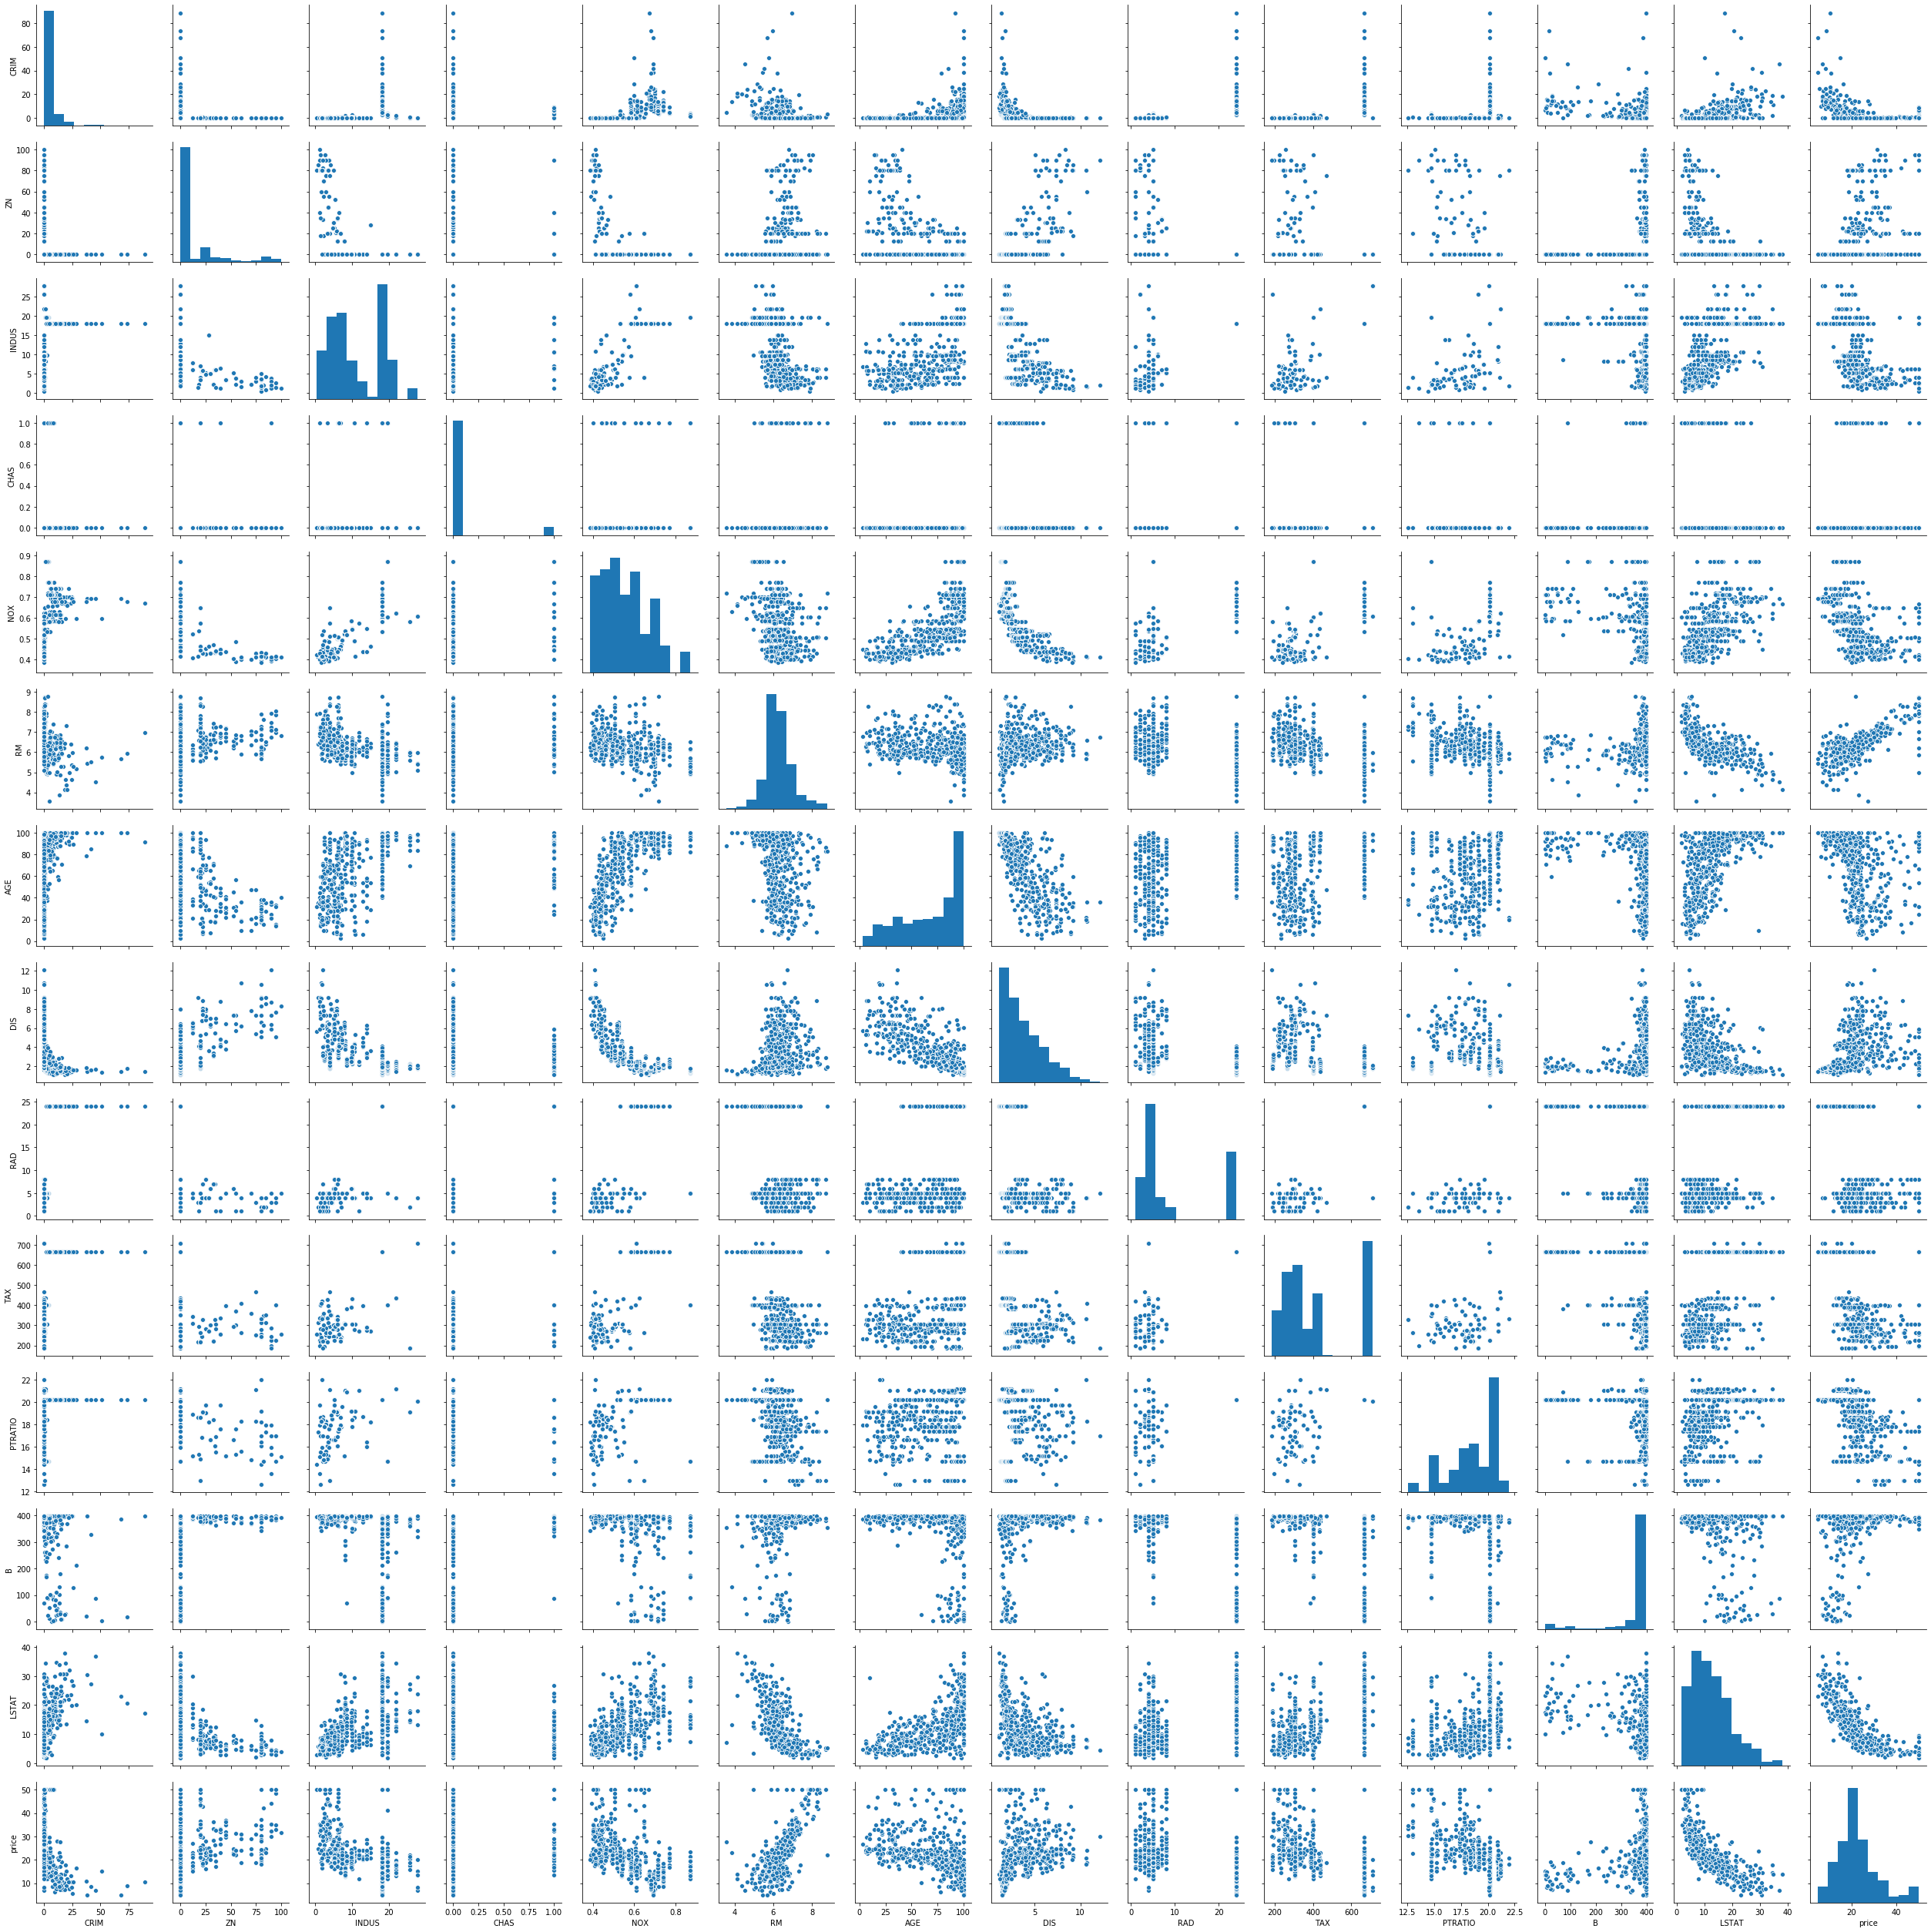

In [13]:
dd.scatter_plots(df, threshold={'Outlier': 0.9})

## Advanced Analysis
In addition to general plots, we can also use some ML-specific analyses as shown below.

### Cluster Analysis
What segments or groups are present in the data?

'[None] not found in axis'


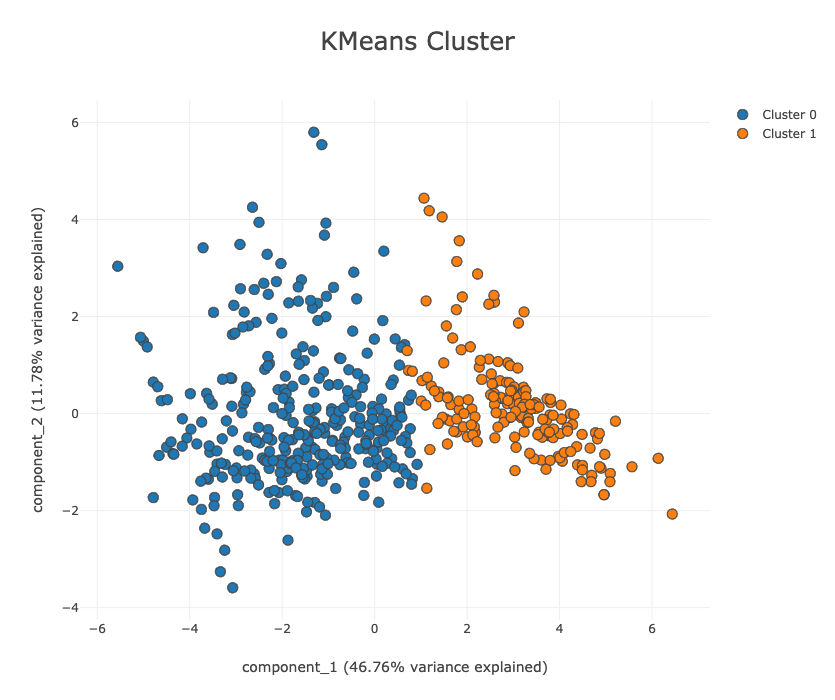

In [14]:
dd.cluster(df)

From this plot, we see that there does not appear to be strongly distinct clusters in the data.

### Feature Importance

Which features are most predictive of price? We use Random Forest as a baseline model to test for importance.

In [15]:
from sklearn.ensemble import RandomForestRegressor

Text(0.5, 1.0, 'Feature Importance')

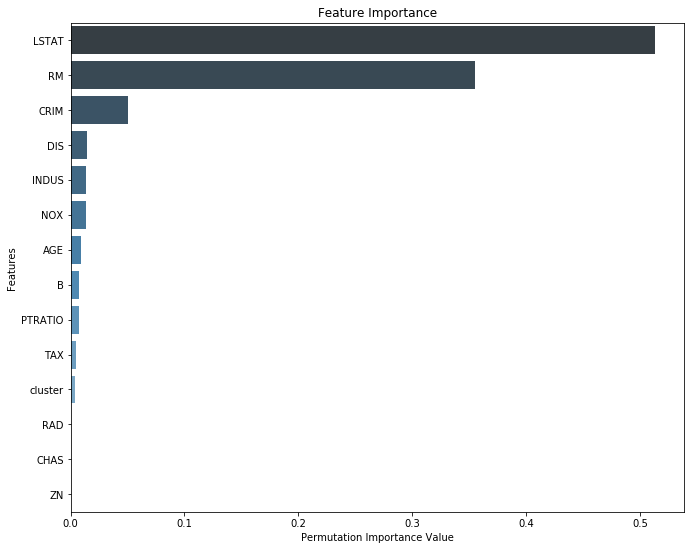

In [16]:
dd.importance(df, 'price', estimator=RandomForestRegressor(random_state=42))

It appears that `LSTAT` and `RM` are most important for predicting price.

### Topic Modeling
Since the Boston housing data set does not contain textual features, the 20 newsgroups text dataset is used to demonstrate the **Topic Modeling** widget.

In [17]:
from sklearn.datasets import fetch_20newsgroups

In [18]:
dat = fetch_20newsgroups(subset='test')
df2 = pd.DataFrame({'text': dat['data']})
df2 = df2.sample(150)

In [19]:
df2.head()

,text
782,From: jpsb@NeoSoft.com (Jim Shirreffs)\nSubjec...
1960,"Reply-To: dcs@witsend.tnet.com\nFrom: ""D. C. S..."
1850,From: baxter@ed0118.ped.pto.ford.com (Gene Bax...
772,From: rbp@netcom.com (Bob Pasker)\nSubject: Re...
161,From: tti@world.std.com (Joachim Martillo)\nSu...


Text preprocessing can be applied before topic modeling to improve accuracy.

In [20]:
%%capture
from data_describe.text.text_preprocessing import preprocess_texts, bag_of_words_to_docs
processed = preprocess_texts(df2['text'])
text = bag_of_words_to_docs(processed)

In [21]:
from data_describe.text import topic_model

In [22]:
# lda_model = topic_model.TopicModel(num_topics=3)
# lda_model.fit(text)
# lda_model.show()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.007174 -0.025504       1        1  37.229218
0     -0.025703  0.017437       2        1  36.381588
1      0.032877  0.008067       3        1  26.389200, topic_info=    Category       Freq        Term      Total  loglift  logprob
65   Default  37.000000        list  37.000000  30.0000  30.0000
102  Default  14.000000        bill  14.000000  29.0000  29.0000
167  Default  19.000000       david  19.000000  28.0000  28.0000
116  Default  22.000000  technology  22.000000  27.0000  27.0000
85   Default  44.000000    computer  44.000000  26.0000  26.0000
40   Default  24.000000     without  24.000000  25.0000  25.0000
157  Default  18.000000       group  18.000000  24.0000  24.0000
58   Default  30.000000     systems  30.000000  23.0000  23.0000
166  Default  35.000000      anyone  35.000000  22.0000  22.0000
4    Default  27.000000        help  27.000000  21.0000  21.0000
97   Default  15.000000       voice  15.000000  20.0000  20.0000
137  Default  20.000000     message  20.000000  19.0000  19.0000
132  Default  13.000000         try  13.000000  18.0000  18.0000
148  Default  17.000000        give  17.000000  17.0000  17.0000
42   Default  11.000000       wrote  11.000000  16.0000  16.0000
147  Default  11.000000         run  11.000000  15.0000  15.0000
136  Default  25.000000       using  25.000000  14.0000  14.0000
150  Default  16.000000       least  16.000000  13.0000  13.0000
70   Default  29.000000          go  29.000000  12.0000  12.0000
103  Default  37.000000        chip  37.000000  11.0000  11.0000
11   Default  23.000000     someone  23.000000  10.0000  10.0000
34   Default  31.000000       right  31.000000   9.0000   9.0000
52   Default  14.000000       phone  14.000000   8.0000   8.0000
120  Default  29.000000        work  29.000000   7.0000   7.0000
176  Default  10.000000        kind  10.000000   6.0000   6.0000
152  Default  18.000000     program  18.000000   5.0000   5.0000
131  Default  18.000000      thanks  18.000000   4.0000   4.0000
63   Default  43.000000         use  43.000000   3.0000   3.0000
9    Default  30.000000      really  30.000000   2.0000   2.0000
79   Default  32.000000        used  32.000000   1.0000   1.0000
..       ...        ...         ...        ...      ...      ...
11    Topic3  10.650695     someone  23.487789   0.5414  -4.5533
175   Topic3   4.622958      called  10.359889   0.5253  -5.3879
4     Topic3  12.227762        help  27.568657   0.5192  -4.4152
136   Topic3  11.085408       using  25.222254   0.5101  -4.5133
139   Topic3   8.911619        user  20.704691   0.4892  -4.7316
94    Topic3   5.988432        file  13.953191   0.4863  -5.1291
82    Topic3   6.954559   institute  16.222157   0.4852  -4.9795
131   Topic3   7.672503      thanks  18.220200   0.4673  -4.8813
27    Topic3   5.169550     network  12.287523   0.4664  -5.2761
138   Topic3   6.366204    opinions  15.204302   0.4616  -5.0679
166   Topic3  14.646997      anyone  35.184784   0.4558  -4.2347
85    Topic3  17.889515    computer  44.972630   0.4104  -4.0347
9     Topic3  12.210807      really  30.122215   0.4293  -4.4166
79    Topic3  12.456960        used  32.256866   0.3808  -4.3966
56    Topic3   9.393324    software  23.717815   0.4060  -4.6789
110   Topic3  10.579075      number  27.553713   0.3750  -4.5600
71    Topic3  15.417943  government  53.614895   0.0859  -4.1834
119   Topic3   9.679013         usa  27.627396   0.2834  -4.6490
77    Topic3  11.688657       think  37.460270   0.1676  -4.4603
36    Topic3   9.465470   something  27.385136   0.2699  -4.6713
96    Topic3   8.511691      things  22.585022   0.3564  -4.7775
123   Topic3   7.979201        ever  21.043987   0.3624  -4.8421
63    Topic3  11.148822         use  43.988110  -0.0404  -4.5076
122   Topic3   8.573167      better  25.673031   0.2354  -4.7703
58    Topic3   8.927632     systems  30.301823 